<a href="https://colab.research.google.com/github/ljabbie/lj/blob/main/hw8_2c_done.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.integrate import odeint
import copy
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 22})

##2C.
Effect of changing T on a(z) & X(z) plots?

In [2]:
def coupled_odes_2(X, Z):

  density_cat = 50  # kg-cat/m^3
  k_b = 0.003344 # Replacing k_prime with k_b kmol/kg-cat*s*atm^2
  PA0 = 12 # atm
  CA0 = 0.22 # kmol/m^3
  U0 = 2.5 # m/s
  
  ddZ = np.zeros(1, dtype=float) # initialize an empty array
  ddZ = ((density_cat)*(1/(1+12*(((Z/(2.5+(5*X)))**.5))))*k_b*(((PA0*(1-X)/(1+(2*X)))**2)))/(U0*CA0)
  
  
  return ddZ

In [3]:
Z = np.arange(0.,2.0,.2)

XA0 = 0.0  #Initial conversion

sol_2 = odeint(coupled_odes_2, XA0, Z)    # solve the ODE
a = (1/(1+12*((Z/(2.5+(5*sol_2[:,0])))**.5)))  # solve for a

In [4]:
print(sol_2[:,0])
print(a)


[0.         0.54362477 0.62682431 0.67164587 0.70143695 0.72332625
 0.74039939 0.7542579  0.7658336  0.7757134 ]
[1.         0.29856957 0.23824224 0.20659554 0.18590266 0.17088035
 0.15927508 0.1499298  0.14217712 0.13559977]


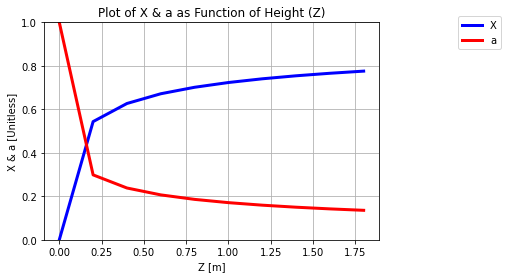

In [5]:
plt.plot(Z, sol_2[:,0], '-', color = "blue", linewidth = 3, label= "X")
plt.plot(Z, a, '-',  color="red", linewidth = 3, label="a")
plt.legend(loc='upper center', bbox_to_anchor=(1.3, 1.05))
plt.title("Plot of X & a as Function of Height (Z)")
plt.xlabel("Z [m]")
plt.ylabel("X & a [Unitless]")
plt.ylim([0,1])
plt.grid()
plt.show()